In [1]:
from tensorflow import keras
from Skripsi import Preprocessing
from Skripsi import Evaluation
from Skripsi import LSTMUnit
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_dfd = pd.read_csv('../Dataset/Binance_BTCUSDT_1h.csv')
df = Preprocessing.feature_selection(btc_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, btc_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
btc_train_X, btc_train_y = Preprocessing.create_dataset(train,5)
btc_test_X, btc_test_y = Preprocessing.create_dataset(test,5)

duplicate ok
No missing value


In [3]:
sorted_df = btc_dfd.sort_values(by=['Date']).copy()
date = sorted_df['Date']
date_test = date.loc[5249:]
date_test.shape

(5250,)

In [4]:
date_test

5249    2022-05-27 06:00:00
5248    2022-05-27 07:00:00
5247    2022-05-27 08:00:00
5246    2022-05-27 09:00:00
5245    2022-05-27 10:00:00
               ...         
4       2022-12-31 19:00:00
3       2022-12-31 20:00:00
2       2022-12-31 21:00:00
1       2022-12-31 22:00:00
0       2022-12-31 23:00:00
Name: Date, Length: 5250, dtype: object

In [5]:
type(date_test)

pandas.core.series.Series

In [6]:
btc_test_y

array([0.38515838, 0.38544456, 0.38463778, ..., 0.19251245, 0.19208658,
       0.19242129])

In [7]:
eth_dfd = pd.read_csv('../Dataset/Binance_ETHUSDT_1h.csv')
df = Preprocessing.feature_selection(eth_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, eth_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
eth_train_X, eth_train_y = Preprocessing.create_dataset(train,5)
eth_test_X, eth_test_y = Preprocessing.create_dataset(test,5)

duplicate ok
No missing value


In [8]:
ltc_dfd = pd.read_csv('../Dataset/Binance_LTCUSDT_1h.csv')
df = Preprocessing.feature_selection(ltc_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, ltc_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
ltc_train_X, ltc_train_y = Preprocessing.create_dataset(train,5)
ltc_test_X, ltc_test_y = Preprocessing.create_dataset(test,5)

duplicate ok
No missing value


In [9]:
best_lstm_btc = keras.models.load_model('../Model LSTM BTC/LSTM_BTC(64, 100, 60).h5')
best_bilstm_btc = keras.models.load_model('../Model BiLSTM BTC/BiLSTM_BTC(128, 50, 60).h5')
best_lstm_eth = keras.models.load_model('../Model LSTM ETH/LSTM_ETH(32, 100, 50).h5')
best_bilstm_eth = keras.models.load_model('../Model BiLSTM ETH/BiLSTM_ETH(32, 100, 60).h5')
best_lstm_ltc = keras.models.load_model('../Model LSTM LTC/LSTM_LTC(32, 50, 50).h5')
best_bilstm_ltc = keras.models.load_model('../Model BiLSTM LTC/BiLSTM_LTC(32, 50, 100).h5')

Metal device set to: Apple M1


2023-03-28 12:55:33.260519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 12:55:33.260874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
btc_inv_y = Preprocessing.inverse_scaler(btc_test_y.reshape(-1,1), btc_scaler)
eth_inv_y = Preprocessing.inverse_scaler(eth_test_y.reshape(-1,1), eth_scaler)
ltc_inv_y = Preprocessing.inverse_scaler(ltc_test_y.reshape(-1,1), ltc_scaler)

In [11]:
test_x2 = btc_test_X
yhat = best_lstm_btc.predict(test_x2)
inv_yhat_lstm_btc = Preprocessing.inverse_scaler(yhat, btc_scaler)
print(inv_yhat_lstm_btc)
print("Neurons: "+str(best_lstm_btc.layers[0].units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_lstm_btc)[0])
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_lstm_btc)[0])
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_lstm_btc)[0])

2023-03-28 12:55:34.453307: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-28 12:55:34.563582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:34.600620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 3ms/step
[[28688.186]
 [28797.582]
 [28902.715]
 ...
 [17025.646]
 [17009.236]
 [16969.416]]
Neurons: 60
RMSE
305.2878350439152
MAE
264.6825748065484
MAPE
1.3773019210892907


In [12]:
test_x2 = btc_test_X
yhat = best_bilstm_btc.predict(test_x2)
inv_yhat_bilstm_btc = Preprocessing.inverse_scaler(yhat, btc_scaler)
print(inv_yhat_bilstm_btc)
print("Neurons: "+str(best_bilstm_btc.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_bilstm_btc)[0])
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_bilstm_btc)[0])
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_bilstm_btc)[0])

 12/165 [=>............................] - ETA: 0s 

2023-03-28 12:55:35.383565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:35.426067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:35.434899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 5ms/step
[[28918.525]
 [28937.129]
 [29040.992]
 ...
 [16501.979]
 [16488.523]
 [16456.201]]
Neurons: 60
RMSE
176.611384637164
MAE
110.43407563244017
MAPE
0.5335014255671056


In [13]:
test_x2 = eth_test_X
yhat = best_lstm_eth.predict(test_x2)
inv_yhat_lstm_eth = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_lstm_eth.layers[0].units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_lstm_eth)[0])
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_lstm_eth)[0])
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_lstm_eth)[0])

 39/165 [======>.......................] - ETA: 0s

2023-03-28 12:55:36.440047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:36.466706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 3ms/step
Neurons: 50
RMSE
16.323494937959005
MAE
11.323005652436775
MAPE
0.7728491991362114


In [14]:
test_x2 = eth_test_X
yhat = best_bilstm_eth.predict(test_x2)
inv_yhat_bilstm_eth = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_bilstm_eth.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_bilstm_eth)[0])
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_bilstm_eth)[0])
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_bilstm_eth)[0])

 11/165 [=>............................] - ETA: 0s 

2023-03-28 12:55:37.152454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:37.195350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:37.203689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 5ms/step
Neurons: 60
RMSE
17.818383054681135
MAE
12.75837277994794
MAPE
0.8682384930320949


In [15]:
test_x2 = ltc_test_X
yhat = best_lstm_ltc.predict(test_x2)
inv_yhat_lstm_ltc = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_lstm_ltc.layers[0].units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_lstm_ltc)[0])
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_lstm_ltc)[0])
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_lstm_ltc)[0])

 39/165 [======>.......................] - ETA: 0s

2023-03-28 12:55:38.195019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:38.220472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 3ms/step
Neurons: 50
RMSE
0.6421834454694406
MAE
0.43679842174711614
MAPE
0.725679370379495


In [16]:
test_x2 = ltc_test_X
yhat = best_bilstm_ltc.predict(test_x2)
inv_yhat_bilstm_ltc = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_bilstm_ltc.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_bilstm_ltc)[0])
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_bilstm_ltc)[0])
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_bilstm_ltc)[0])

 11/165 [=>............................] - ETA: 0s 

2023-03-28 12:55:38.900124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:38.952965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-28 12:55:38.961453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 1s 5ms/step
Neurons: 100
RMSE
0.6519435988188208
MAE
0.4371148363095238
MAPE
0.7359933434121714


In [17]:
x = Preprocessing.inverse_scaler([[0.19242129]], btc_scaler)
x

array([[16542.40008993]])

In [18]:
inv_yhat_lstm_btc.shape

(5250, 1)

In [19]:
date_test

5249    2022-05-27 06:00:00
5248    2022-05-27 07:00:00
5247    2022-05-27 08:00:00
5246    2022-05-27 09:00:00
5245    2022-05-27 10:00:00
               ...         
4       2022-12-31 19:00:00
3       2022-12-31 20:00:00
2       2022-12-31 21:00:00
1       2022-12-31 22:00:00
0       2022-12-31 23:00:00
Name: Date, Length: 5250, dtype: object

In [20]:
df_btc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(btc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_btc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_btc)})
df_btc['Date'] = pd.to_datetime(df_btc['Date_string'])
df_btc = df_btc.tail(168)
df_eth = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(eth_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_eth), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_eth)})
df_eth['Date'] = pd.to_datetime(df_eth['Date_string'])
df_eth = df_eth.tail(168)
df_ltc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(ltc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_ltc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_ltc)})
df_ltc['Date'] = pd.to_datetime(df_ltc['Date_string'])
df_ltc = df_ltc.tail(168)

In [21]:
df_btc

,Date_string,Real Price,Price LSTM,Price BiLSTM,Date
5082,2022-12-25 00:00:00,16843.95,17269.080078,16760.408203,2022-12-25 00:00:00
5083,2022-12-25 01:00:00,16845.01,17278.417969,16767.996094,2022-12-25 01:00:00
5084,2022-12-25 02:00:00,16827.29,17281.886719,16776.185547,2022-12-25 02:00:00
5085,2022-12-25 03:00:00,16832.14,17268.574219,16766.427734,2022-12-25 03:00:00
5086,2022-12-25 04:00:00,16822.38,17276.390625,16767.029297,2022-12-25 04:00:00
...,...,...,...,...,...
5245,2022-12-31 19:00:00,16570.14,17023.027344,16526.478516,2022-12-31 19:00:00
5246,2022-12-31 20:00:00,16568.60,17024.281250,16508.261719,2022-12-31 20:00:00
5247,2022-12-31 21:00:00,16548.28,17025.646484,16501.978516,2022-12-31 21:00:00
5248,2022-12-31 22:00:00,16520.81,17009.236328,16488.523438,2022-12-31 22:00:00


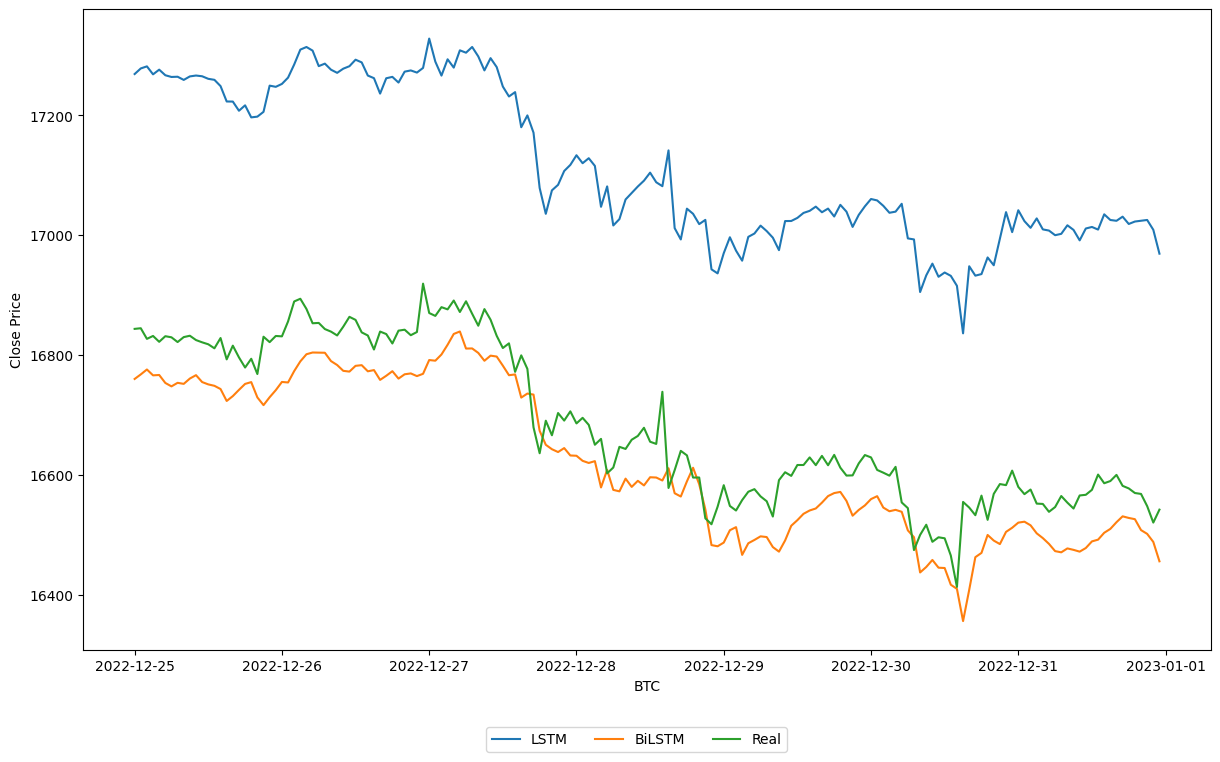

In [22]:
fig, axs = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)
fig.tight_layout()

axs.plot(df_btc['Date'], df_btc['Price LSTM'])
axs.plot(df_btc['Date'], df_btc['Price BiLSTM'])
axs.plot(df_btc['Date'], df_btc['Real Price'])
axs.set_xlabel('BTC')
axs.set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
fig.savefig('../../Skripsi/img/predictCompareBTC.png', dpi=300, bbox_inches='tight')

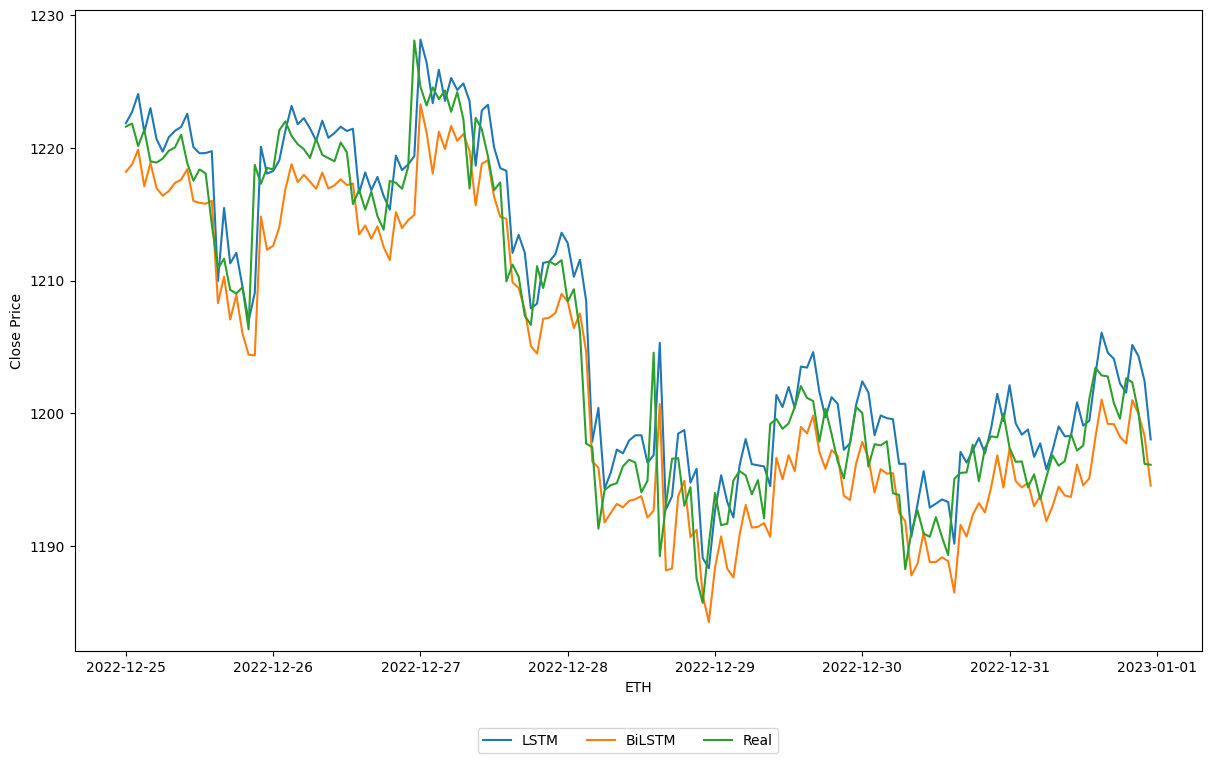

In [23]:
fig, axs = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)
fig.tight_layout()

axs.plot(df_eth['Date'], df_eth['Price LSTM'])
axs.plot(df_eth['Date'], df_eth['Price BiLSTM'])
axs.plot(df_eth['Date'], df_eth['Real Price'])
axs.set_xlabel('ETH')
axs.set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
fig.savefig('../../Skripsi/img/predictCompareETH.png', dpi=300, bbox_inches='tight')

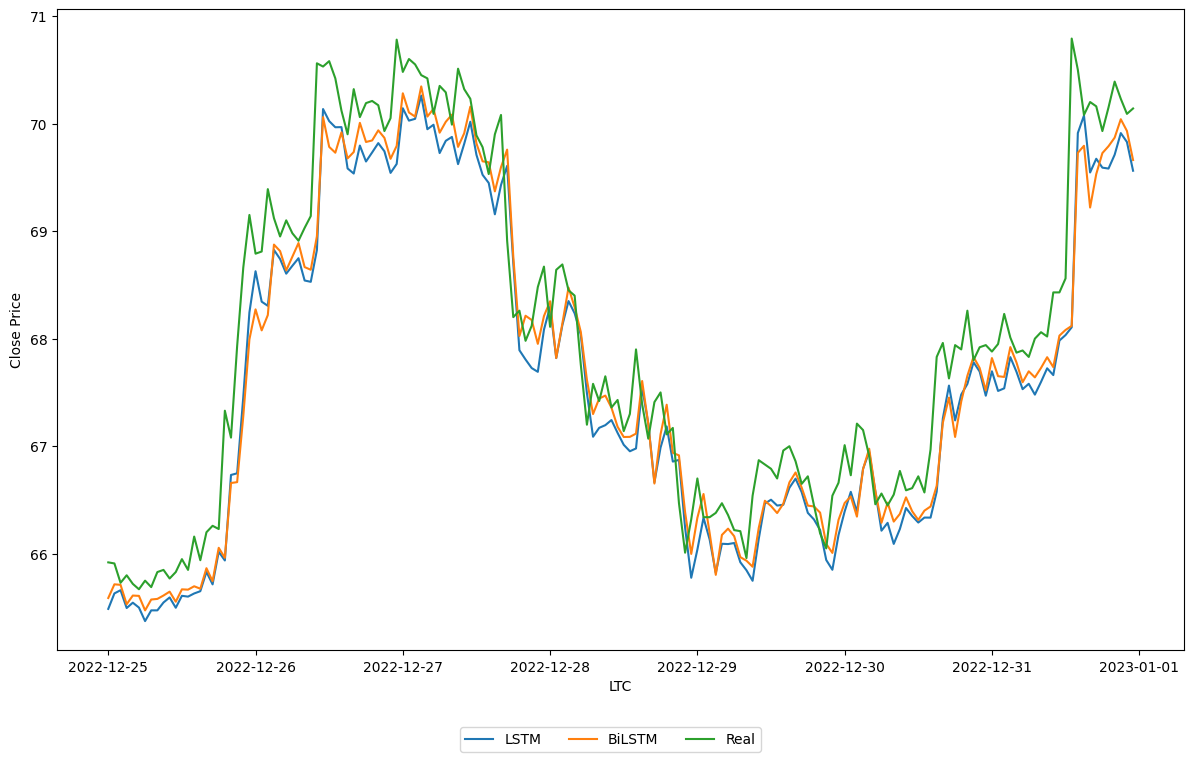

In [24]:
fig, axs = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)
fig.tight_layout()

axs.plot(df_ltc['Date'], df_ltc['Price LSTM'])
axs.plot(df_ltc['Date'], df_ltc['Price BiLSTM'])
axs.plot(df_ltc['Date'], df_ltc['Real Price'])
axs.set_xlabel('LTC')
axs.set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
fig.savefig('../../Skripsi/img/predictCompareLTC.png', dpi=300, bbox_inches='tight')